In [1]:
pdf_path  = "Constitution.pdf"

In [2]:
# Requires !pip install PyMuPDF, see: https://github.com/pymupdf/pymupdf
import fitz # (pymupdf, found this is better than pypdf for our use case, note: licence is AGPL-3.0, keep that in mind if you want to use any code commercially)
from tqdm.auto import tqdm # for progress bars, requires !pip install tqdm 
import re

def text_formatter(text: str) -> str:
    cleaned_text = text.replace("\n", " ").strip()
    # Define the pattern for valid characters, including space and fixing the character range issue
    pattern = r'[a-zA-Z0-9!@#$%^&()_+={}|\[\]\\:";\'<>?,./`~^ \-]'
    
    # Create a set of valid characters from the pattern
    valid_chars = set(re.findall(pattern, text))
    
    # Use list comprehension to filter out unwanted characters while keeping only the valid ones
    cleaned_text = "".join([char for char in text if char in valid_chars])

    # Remove sequences of more than two spaces
    cleaned_text = re.sub(r'\s{2,}', '  ', cleaned_text)  # Replace 3 or more spaces with 2

    # Remove everything after an underscore (_) in each word
    cleaned_text = re.sub(r'_[^\n]*', '', cleaned_text)

    return cleaned_text



# Open PDF and get lines/pages
# Note: this only focuses on text, rather than images/figures etc
def open_and_read_pdf(pdf_path: str) -> list[dict]:

    doc = fitz.open(pdf_path)  # open a document
    
    print("doc is " , doc)
    print("doc is " , dict(enumerate(doc)))
    
    pages_and_texts = [] 
    
    for page_number, page in tqdm(enumerate(doc)): 
        text = page.get_text() 
        text = text_formatter(text)
        pages_and_texts.append({"page_number": page_number - 30,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,
                                "text": text})
    return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[31]


c:\Users\Bhavesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


doc is  Document('Constitution.pdf')
doc is  {0: page 0 of Constitution.pdf, 1: page 1 of Constitution.pdf, 2: page 2 of Constitution.pdf, 3: page 3 of Constitution.pdf, 4: page 4 of Constitution.pdf, 5: page 5 of Constitution.pdf, 6: page 6 of Constitution.pdf, 7: page 7 of Constitution.pdf, 8: page 8 of Constitution.pdf, 9: page 9 of Constitution.pdf, 10: page 10 of Constitution.pdf, 11: page 11 of Constitution.pdf, 12: page 12 of Constitution.pdf, 13: page 13 of Constitution.pdf, 14: page 14 of Constitution.pdf, 15: page 15 of Constitution.pdf, 16: page 16 of Constitution.pdf, 17: page 17 of Constitution.pdf, 18: page 18 of Constitution.pdf, 19: page 19 of Constitution.pdf, 20: page 20 of Constitution.pdf, 21: page 21 of Constitution.pdf, 22: page 22 of Constitution.pdf, 23: page 23 of Constitution.pdf, 24: page 24 of Constitution.pdf, 25: page 25 of Constitution.pdf, 26: page 26 of Constitution.pdf, 27: page 27 of Constitution.pdf, 28: page 28 of Constitution.pdf, 29: page 29 of Co

402it [00:01, 224.05it/s]


{'page_number': 1,
 'page_char_count': 589,
 'page_word_count': 84,
 'page_sentence_count_raw': 1,
 'page_token_count': 147.25,
 'text': 'THE CONSTITUTION OF INDIA PREAMBLEWE, THE PEOPLE OF INDIA, having solemnly resolved to constitute India into a 1[SOVEREIGN SOCIALIST SECULAR DEMOCRATIC REPUBLIC] and to secure to all its citizens:JUSTICE, social, economic and political; LIBERTY of thought, expression, belief, faith and worship;EQUALITY of status and of opportunity;and to promote among them allFRATERNITY assuring the dignity of the individual and the 2[unity and integrity of the Nation];IN OUR CONSTITUENT ASSEMBLY this twenty-sixth day of November, 1949, do HEREBY ADOPT, ENACT AND GIVE TO OURSELVES THIS CONSTITUTION.'}

In [3]:
import random 
pages_and_texts = pages_and_texts[31:]
random.sample(pages_and_texts,k=3)

[{'page_number': 335,
  'page_char_count': 1683,
  'page_word_count': 256,
  'page_sentence_count_raw': 21,
  'page_token_count': 420.75,
  'text': 'THE CONSTITUTION OF  INDIA(Ninth Schedule)335133. The Departmentalisation of Union Accounts (Transfer of Personnel) Act, 1976 (Central Act 59 of 1976).134. The Assam Fixation of Ceiling on Land Holdings Act, 1956 (Assam Act I of 1957). 135. The Bombay Tenancy and Agricultural Lands (Vidarbha Region) Act, 1958 (Bombay Act XCIX of 1958).136. The Gujarat Private Forests (Acquisition) Act, 1972 (Gujarat Act 14 of 1973). 137. The Haryana Ceiling on Land Holdings (Amendment) Act, 1976 (Haryana Act 17 of 1976).138. The Himachal Pradesh Tenancy and Land Reforms Act, 1972 (Himachal Pradesh Act 8 of 1974).139. The Himachal Pradesh Village Common Lands Vesting and Utilisation Act, 1974 (Himachal Pradesh Act 18 of 1974).140. The Karnataka Land Reforms (Second Amendment and Miscellaneous Provisions) Act, 1974 (Karnataka Act 31 of 1974).141. The Karnata

In [4]:
pages_and_texts[0]

{'page_number': 1,
 'page_char_count': 589,
 'page_word_count': 84,
 'page_sentence_count_raw': 1,
 'page_token_count': 147.25,
 'text': 'THE CONSTITUTION OF INDIA PREAMBLEWE, THE PEOPLE OF INDIA, having solemnly resolved to constitute India into a 1[SOVEREIGN SOCIALIST SECULAR DEMOCRATIC REPUBLIC] and to secure to all its citizens:JUSTICE, social, economic and political; LIBERTY of thought, expression, belief, faith and worship;EQUALITY of status and of opportunity;and to promote among them allFRATERNITY assuring the dignity of the individual and the 2[unity and integrity of the Nation];IN OUR CONSTITUENT ASSEMBLY this twenty-sixth day of November, 1949, do HEREBY ADOPT, ENACT AND GIVE TO OURSELVES THIS CONSTITUTION.'}

In [5]:
# !pip install spacy
from spacy.lang.en import English

nlp = English()

# add a sentencier pipeline .

nlp.add_pipe("sentencizer")

#create doc instance as an example

doc = nlp("this is a sentence . This another sentence. I like elephant.")

assert len(list(doc.sents)) == 3

list(doc.sents)

[this is a sentence ., This another sentence., I like elephant.]

In [6]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)   
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]
    item["page_sentence_count_spacy"] = len(item["sentences"])
 

100%|██████████| 371/371 [00:01<00:00, 313.95it/s]


In [7]:
#Define split sixw to turn groups of sentences into chunks.
num_sentence_chunk_size = 10

#create a function to split lists of texts recursively into chink size

#EG [20] -> [10 ,10 ] OR [25] -> [10,10,5]

def split_list(input_list : list[str],
               slice_size : int = num_sentence_chunk_size ) -> list[list[str]]:
    return [input_list[i: i + slice_size] for i in range(0,len(input_list), slice_size)]

test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [8]:

for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                        slice_size=num_sentence_chunk_size)
    
    item["num_chunks"] = len(item["sentence_chunks"])

100%|██████████| 371/371 [00:00<?, ?it/s]


In [9]:
random.sample(pages_and_texts , k=1)

[{'page_number': 204,
  'page_char_count': 2295,
  'page_word_count': 380,
  'page_sentence_count_raw': 3,
  'page_token_count': 573.75,
  'text': 'THE CONSTITUTION OF  INDIA(Part XVIILANGUAGE)204(d) the form of numerals to be used for any one or more specified purposes of the Union;(e) any other matter referred to the Commission by the President as regards the official language of the Union and the language for communication between the Union and a State or between one State and another and their use.(3) In making their recommendations under clause (2), the Commission shall have due regard to the industrial, cultural and scientific advancement of India, and the just claims and the interests of persons belonging to the  non-Hindi speaking areas in regard to the public services.(4) There shall be constituted a Committee consisting of thirty members, of whom twenty shall be members of the House of the People and ten shall be members of the Council of States to be elected respectively by 

In [10]:
import re

#split each chunk into its own item
pages_and_chunks = []

for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]
        
        # join the sentences together into a paragraph like structure , aka join the list of sentences into one paragraph
        
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
      
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)
        
        chunk_dict["sentence_chunk"] = joined_sentence_chunk
        
        #get some stats on our chunk
        
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] =len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)/4 #1 token =~ 4 chars
        
        pages_and_chunks.append(chunk_dict)
        
len(pages_and_chunks)

100%|██████████| 371/371 [00:00<00:00, 38402.93it/s]


435

In [11]:
random.sample(pages_and_chunks , k=1)

[{'page_number': 1,
  'sentence_chunk': 'THE CONSTITUTION OF INDIA PREAMBLEWE, THE PEOPLE OF INDIA, having solemnly resolved to constitute India into a 1[SOVEREIGN SOCIALIST SECULAR DEMOCRATIC REPUBLIC] and to secure to all its citizens:JUSTICE, social, economic and political; LIBERTY of thought, expression, belief, faith and worship;EQUALITY of status and of opportunity;and to promote among them allFRATERNITY assuring the dignity of the individual and the 2[unity and integrity of the Nation];IN OUR CONSTITUENT ASSEMBLY this twenty-sixth day of November, 1949, do HEREBY ADOPT, ENACT AND GIVE TO OURSELVES THIS CONSTITUTION.',
  'chunk_char_count': 589,
  'chunk_word_count': 84,
  'chunk_token_count': 147.25}]

In [12]:
import pandas as pd
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,435.00,435.00,435.00,435.00
mean,199.84,1578.46,255.78,394.62
std,111.33,706.59,125.41,176.65
min,1.00,9.00,1.00,2.25
25%,101.00,1029.00,147.50,257.25
50%,207.00,1746.00,286.00,436.50
75%,310.00,2134.50,354.50,533.62
max,371.00,3671.00,567.00,917.75


In [13]:
min_token_length = 30
# the minimum token length may vary with experimentation ,  so we need to experiment 
# and see which token length doesnt contain much informatation we need

for row in df[df["chunk_token_count"] <=min_token_length ].sample(5).iterrows():
    print(f"chunk token count : {row[1]["chunk_token_count"]} |  text ; {row[1]["sentence_chunk"]}")

chunk token count : 22.0 |  text ; The West Bengal Restoration of Alienated Land Act, 1973 (West Bengal Act XXIII of 1973).
chunk token count : 26.5 |  text ; The Madhya Pradesh Ceiling on Agricultural Holdings (Amendment) Act, 1984 (Madhya Pradesh Act 14 of 1984).
chunk token count : 5.75 |  text ; 2MekliganjPatgram201.13
chunk token count : 14.0 |  text ; 111PART VII[The States in Part B of the First Schedule].
chunk token count : 2.25 |  text ; Sanskrit.


In [14]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length ].to_dict(orient="records")
pages_and_chunks_over_min_token_len

[{'page_number': 1,
  'sentence_chunk': 'THE CONSTITUTION OF INDIA PREAMBLEWE, THE PEOPLE OF INDIA, having solemnly resolved to constitute India into a 1[SOVEREIGN SOCIALIST SECULAR DEMOCRATIC REPUBLIC] and to secure to all its citizens:JUSTICE, social, economic and political; LIBERTY of thought, expression, belief, faith and worship;EQUALITY of status and of opportunity;and to promote among them allFRATERNITY assuring the dignity of the individual and the 2[unity and integrity of the Nation];IN OUR CONSTITUENT ASSEMBLY this twenty-sixth day of November, 1949, do HEREBY ADOPT, ENACT AND GIVE TO OURSELVES THIS CONSTITUTION.',
  'chunk_char_count': 589,
  'chunk_word_count': 84,
  'chunk_token_count': 147.25},
 {'page_number': 2,
  'sentence_chunk': '2PART ITHE UNION AND ITS TERRITORY1. Name and territory of the Union.(1) India, that is Bharat, shall be a Union of States.1[(2) The States and the territories thereof shall be as specified in the First Schedule.](3) The territory of India s

In [15]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path = "all-mpnet-base-v2",
                                      device="cpu")

# create a list of sentences

sentences = ["The sentence transformer library provides an easy way t create embeddings. " ,
             "sentences can be embedded one by one or in a list",
             "I like horses !"]

# sentences are encoded/embedded by calling model.encode()

embeddings = embedding_model.encode(sentences)

embedding_dict = dict(zip(sentences , embeddings))

# see the embedddings

for sentence , embedding in embedding_dict.items():
    print(f"sentence : {sentence}")
    print(f"embedding : {embedding}")
    print(f"")

RuntimeError: Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [ ]:
embedding = embedding_model.encode("what is freedom of speech")
embedding

array([ 2.62208488e-02,  7.26968225e-04,  3.12477164e-03,  6.30646152e-03,
       -2.62706447e-02,  5.02852984e-02,  1.33041777e-02,  6.55613560e-03,
        4.06217314e-02, -2.92997193e-02, -1.05655426e-02, -4.76738699e-02,
        2.74348129e-02, -3.57492566e-02, -6.78696409e-02, -3.00030131e-02,
        1.26249231e-02, -5.49394712e-02,  5.23539074e-02, -2.48143841e-02,
        3.28339264e-02,  1.74155261e-03, -4.96342443e-02,  1.65794492e-02,
       -2.19698269e-02, -3.33058573e-02,  4.41949964e-02, -6.49190769e-02,
       -4.65948880e-03,  5.69721125e-02, -6.12160787e-02, -4.93523404e-02,
        1.60187092e-02,  3.30191366e-02,  1.10564520e-06, -6.43953010e-02,
       -9.65661276e-03,  4.65463251e-02,  2.06486639e-02,  5.91638125e-03,
        6.47294372e-02,  6.20685481e-02,  3.61842476e-02,  3.16938199e-02,
       -2.07307544e-02, -2.10171826e-02,  4.55409735e-02,  5.66432327e-02,
        1.08225215e-02,  5.89958541e-02,  3.94130871e-03, -1.43253598e-02,
       -6.40390068e-02, -

In [ ]:

embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

100%|██████████| 429/429 [00:18<00:00, 23.79it/s]


In [ ]:
constitution_RAG02_df= pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "constitution_RAG02_df.csv"
constitution_RAG02_df.to_csv(embeddings_df_save_path,index=False)

In [ ]:
# import saved file and view

constitution_RAG02_df = pd.read_csv(embeddings_df_save_path)
constitution_RAG02_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,1,"THE CONSTITUTION OF INDIA PREAMBLEWE, THE PEOP...",589,84,147.25,[ 1.12478817e-02 2.68535875e-02 2.01700069e-...
1,2,2PART ITHE UNION AND ITS TERRITORY1. Name and ...,1114,183,278.50,[ 6.21333066e-03 -5.06589971e-02 -1.55295562e-...
2,3,THE CONSTITUTION OF INDIA(Part I. Union and it...,1685,282,421.25,[ 3.10739526e-03 -3.56429592e-02 1.46904299e-...
3,4,4PART IICITIZENSHIP 5. Citizenship at the comm...,1934,333,483.50,[ 4.89391806e-03 -1.98225267e-02 -3.28294444e-...
4,5,THE CONSTITUTION OF INDIA(Part II. Citizenship...,2126,365,531.50,[ 5.76570979e-04 -2.70682834e-02 -2.58985115e-...


In [ ]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# import texts and embedding df
text_chunks_and_embeddings_df = pd.read_csv("constitution_RAG02_df.csv")

# convert embedding column back to np.array ( it got converted to string when it saved to CSV , but need numerical not string)
text_chunks_and_embeddings_df["embedding"] = text_chunks_and_embeddings_df["embedding"].apply(lambda x:np.fromstring(x.strip("[]") ,sep=" "))
#sep means seperation bcz there is 1 spaces in between so we use " "

embeddings = torch.tensor(np.stack(text_chunks_and_embeddings_df["embedding"].to_list(),axis=0 ),dtype=torch.float32).to(device)

#convert the texts and embedding df into list of dicts
pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient="records")

text_chunks_and_embeddings_df[:3]

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,1,"THE CONSTITUTION OF INDIA PREAMBLEWE, THE PEOP...",589,84,147.25,"[0.0112478817, 0.0268535875, 0.0201700069, -0...."
1,2,2PART ITHE UNION AND ITS TERRITORY1. Name and ...,1114,183,278.50,"[0.00621333066, -0.0506589971, -0.0155295562, ..."
2,3,THE CONSTITUTION OF INDIA(Part I. Union and it...,1685,282,421.25,"[0.00310739526, -0.0356429592, 0.0146904299, -..."


In [ ]:
from sentence_transformers import util , SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2" , device=device)



In [ ]:
# 1. Define the query

query = "what is freedom of speech"
print(f"query : {query}")

#2.embed the query 

# NOTE : its important to embedd the query with the same embedding model u embedd ur passgaes
# if u want to use a new model for query , u need to embedd ur pasages first with that model

query_embedding= embedding_model.encode(query ,convert_to_tensor=True).to(device)

#3. Get similarity scores with the dot product ( use cosine similairity if the outputs of model arent normalized)

from time import perf_counter as timer 

start_time= timer()
dot_scores = util.dot_score(a = query_embedding , b=embeddings)[0]
end_time = timer()

print(f'[INFO] time taken to get scores on {len(embeddings)} , embeddings : {end_time-start_time:.5f} seconds.')

#4. Get the top-k results with most accuracy not all the results or most similarity
top_results_dot_product = torch.topk(dot_scores , k=5)
top_results_dot_product

query : what is freedom of speech
[INFO] time taken to get scores on 429 , embeddings : 0.00116 seconds.


torch.return_types.topk(
values=tensor([0.2850, 0.2849, 0.2512, 0.2445, 0.2412], device='cuda:0'),
indices=tensor([15, 14, 10,  8, 50], device='cuda:0'))

In [ ]:
query_embedding.dtype , embeddings.dtype

(torch.float32, torch.float32)

In [ ]:
pages_and_chunks[8]

{'page_number': 9,
 'sentence_chunk': 'THE CONSTITUTION OF INDIA(Part III. Fundamental Rights)9(5) Nothing in this article shall affect the operation of any law which provides that the incumbent of an office in connection with the affairs of any religious or denominational institution or any member of the governing body thereof shall be a person professing a particular religion or belonging to a particular denomination.1[(6) Nothing in this article shall prevent the State from making any provision for the reservation of appointments or posts in favour of any economically weaker sections of citizens other than the classes mentioned in clause (4), in addition to the existing reservation and subject to a maximum of ten per cent.of the posts in each category.]17. Abolition of Untouchability. Untouchability is abolished and its practice in any form is forbidden. The enforcement of any disability arising out of Untouchability shall be an offence punishable in accordance with law.18. Abolitio

In [ ]:
import textwrap

def print_wrapped(text , wrap_length=80):
    wrapped_text = textwrap.fill(text,wrap_length)
    print(wrap_length)

In [ ]:
print(f'query : {query} \n')
print("results:")

#loop throughh zipped together scores and indicies torch.ThroughputBenchmark

for score , idx in zip(top_results_dot_product[0] , top_results_dot_product[1]):
    print(f'score : {score:.4f}')
    print("text : ")
    print(pages_and_chunks[idx]["sentence_chunk"])
    print(f"page number : {pages_and_chunks[idx]["page_number"]}")
    print('\n')

query : what is freedom of speech 

results:
score : 0.2850
text : 
THE CONSTITUTION OF INDIA(Part III. Fundamental Rights)15(b) to manage its own affairs in matters of religion;(c) to own and acquire movable and immovable property; and(d) to administer such property in accordance with law.27. Freedom as to payment of taxes for promotion of any particular religion. No person shall be compelled to pay any taxes, the proceeds of which are specifically appropriated in payment of expenses for the promotion or maintenance of any particular religion or religious denomination.28. Freedom as to attendance at religious instruction or religious worship in certain educational institutions.(1) No religious instruction shall be provided in any educational institution wholly maintained out of State funds.(2) Nothing in clause (1) shall apply to an educational institution which is administered by the State but has been established under any endowment or trust which requires that religious instruction

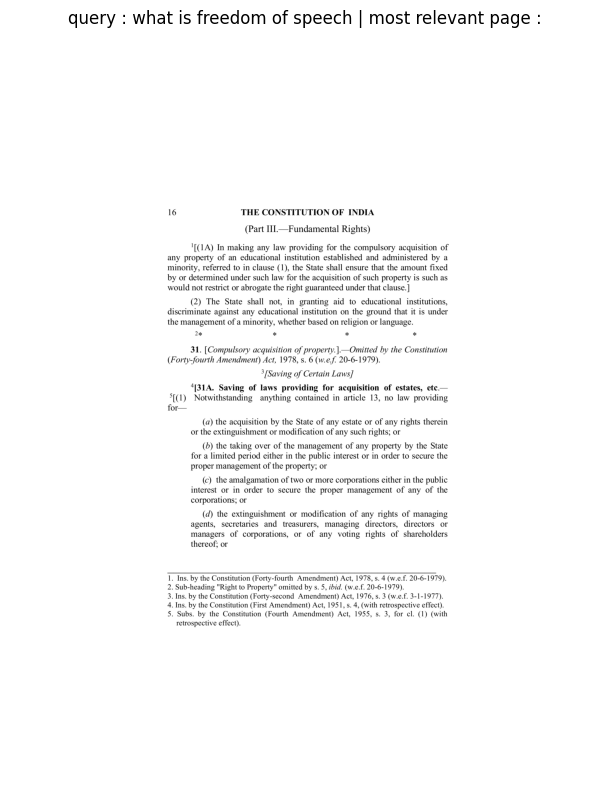

In [ ]:
import fitz

pdf_path = "Constitution.pdf"

doc = fitz.open(pdf_path)
page = doc.load_page(5+41)

#get the image of the pages_and_chunks
img = page.get_pixmap(dpi=300)

#save the image ( optional)
# img.save("output_image_0.jpg")

doc.close()

#convert the pixmap to a numpy array

img_array = np.frombuffer(img.samples_mv , dtype=np.uint8).reshape((img.h,img.w,img.n))

#Display the image using matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"query : {query} | most relevant page : ")
plt.axis("off")
plt.show()

In [ ]:
def dot_product(vector1 , vector2):
    return torch.dot(vector1,vector2)

def cosine_similarity(v1,v2):
    dot_product = torch.dot(v1,v2)
    
    #get euclidean/L2 norm
    #its a mathemetical formula
    norm_vector1 = torch.sqrt(torch.sum(v1**2))
    norm_vector2 = torch.sqrt(torch.sum(v2**2))
    
    return dot_product/(norm_vector1*norm_vector2)

In [ ]:
def retrieve_relevant_resources(query : str , 
                                embeddings : torch.tensor,
                                model : SentenceTransformer = embedding_model , 
                                n_resources_to_return : int =5 , 
                                print_time : bool = True):
    
    # embeds a query with model and returns top k scores and indices from embeddings
    
    #embed the query 
    
    query_embedding = model.encode(query , convert_to_tensor=True)
    
    #get the dot scors on embedding ( bcz our embeddings are already normalized)
    
    start_time = timer()
    dot_scores = util.dot_score(query_embedding , embeddings)[0]
    end_time = timer()
    
    if print_time:
        print(f"[INFO] time taken to get scores on ({len(embeddings)} embeddings : {end_time - start_time :.5f}) seconds. ")
        
    scores , indices = torch.topk(input=dot_scores ,
                                  k=n_resources_to_return
                                  )
    
    return scores,indices


def print_top_result_and_scores(query : str ,
                                embeddings : torch.tensor,
                                pages_and_chunks : list[dict] = pages_and_chunks,
                                n_resources_to_return : int = 5
                                ):
    
    scores , indicies = retrieve_relevant_resources(query=query , 
                                                    embeddings=embeddings,
                                                    n_resources_to_return=n_resources_to_return)
    
    for score , idx in zip(scores  , indicies):
        print(f'score : {score:.4f}')
        print("text : ")
        print(pages_and_chunks[idx]["sentence_chunk"])
        print(f"page number : {pages_and_chunks[idx]["page_number"]}")
        print('\n')

In [ ]:
query="fundamental rights"
retrieve_relevant_resources( query=query, embeddings=embeddings)
print_top_result_and_scores(query=query , embeddings=embeddings)

[INFO] time taken to get scores on (429 embeddings : 0.00010) seconds. 
[INFO] time taken to get scores on (429 embeddings : 0.00008) seconds. 
score : 0.5435
text : 
6PART III FUNDAMENTAL RIGHTSGeneral12. Definition. In this Part, unless the context otherwise requires, the State includes the Government and Parliament of India and the Government and the Legislature of each of the States and all local or other authorities within the territory of India or under the control of the Government of India.13. Laws inconsistent with or in derogation of the fundamental rights.(1) All laws in force in the territory of India immediately before the commencement of this Constitution, in so far as they are inconsistent with the provisions of this Part, shall, to the extent of such inconsistency, be void.(2) The State shall not make any law which takes away or abridges the rights conferred by this Part and any law made in contravention of this clause shall, to the extent of the contravention, be void.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available 
use_quantization_config = True  # Set to True if you want to use quantization

# 1. Create quantization config for smaller model loading (optional)
# Requires %pip install bitsandbytes accelerate, see: https://github.com/TimDettmers/bitsandbytes, https://huggingface.co/docs/accelerate/
# For models that require 4-bit quantization (use this if you have low GPU memory available)
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: Setup Flash Attention 2 for faster inference, default to "sdpa" or "scaled dot product attention" if it's not available
# Flash Attention 2 requires NVIDIA GPU compute capability of 8.0 or above, see: https://developer.nvidia.com/cuda-gpus
# Requires %pip install flash-attn, see: https://github.com/Dao-AILab/flash-attention 
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use (this will depend on how much GPU memory you have available)
#model_id = "google/gemma-7b-it"
model_id = "google/gemma-2-2b-it"

print(f"[INFO] Using model_id: {model_id}")

# 3. Instantiate tokenizer (tokenizer turns text into numbers ready for the model) 
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_id,
    torch_dtype=torch.float16,
    quantization_config=quantization_config,
    device_map="cuda:0",  # Efficient GPU memory usage
    
    attn_implementation=attn_implementation
)

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU 
    llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: google/gemma-2-2b-it


Loading checkpoint shards: 100%|██████████| 2/2 [00:14<00:00,  7.13s/it]


In [ ]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

1602203904

In [ ]:
def get_model_mem_size(model: torch.nn.Module):
   
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate various model sizes
    model_mem_bytes = mem_params + mem_buffers # in bytes
    model_mem_mb = model_mem_bytes / (1024**2) # in megabytes
    model_mem_gb = model_mem_bytes / (1024**3) # in gigabytes

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 2192270336, 'model_mem_mb': 2090.71, 'model_mem_gb': 2.04}

In [ ]:
input_text = "what are fundamental rights ?"

print(f"input text : \n {input_text}")

dialog_template = [
    {
        "role" : "user",
        "content":input_text
    }
]

#apply the chat template 

prompt = tokenizer.apply_chat_template(conversation=dialog_template,
                                       tokenize=False,
                                       add_generation_prompt=True)

print(f"prompt (formatted) : \n {prompt}")

input text : 
 what are fundamental rights ?
prompt (formatted) : 
 <bos><start_of_turn>user
what are fundamental rights ?<end_of_turn>
<start_of_turn>model



In [ ]:
input_ids = tokenizer(prompt,
                      return_tensors="pt").to("cuda")

input_ids

{'input_ids': tensor([[    2,     2,   106,  1645,   108,  5049,   708, 14127,  5691,  1654,
           107,   108,   106,  2516,   108]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [ ]:
from transformers import GenerationConfig

# Define a safe generation config
gen_config = GenerationConfig(
    max_new_tokens=350,
    do_sample=True,         # Enables sampling (less deterministic)
    temperature=0.7,        # Controls randomness (lower = more conservative)
    top_k=50,               # Only keep top 50 tokens with highest probability
    top_p=0.9,              # Nucleus sampling (probability mass of top tokens)
    repetition_penalty=1.2  # Reduces repetitive outputs
)

# Generate output
outputs = llm_model.generate(
    input_ids=input_ids['input_ids'],
    attention_mask=input_ids['attention_mask'],
    generation_config=gen_config
)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

user
what are fundamental rights ?
model
Fundamental rights are basic human freedoms and liberties that are considered essential for a person's dignity, well-being, and equality. They exist because they protect individuals from oppression and allow them to live freely in society.

Here's a breakdown of what defines fundamental rights:

**Key Characteristics:**

* **Universal & Inherent:** Fundamental rights apply to everyone regardless of race, ethnicity, gender, religion, sexual orientation, national origin or any other personal characteristic. 
* **Inviolable:** These rights cannot be taken away by anyone (governments, corporations, private institutions) without legal consequence.  They should not be restricted or limited except when absolutely necessary with proper justification through the law. 
* **Essential Needs:** These rights address fundamental needs like freedom of expression, education, healthcare, safety, security, justice, etc., enabling people to participate fully in lif

In [ ]:
# GPT-4 Generated Questions
gpt4_questions = [
    "What are the fundamental rights guaranteed by the Constitution of India, and how do they protect citizens?",
    "Explain the role of the President of India as defined in the Constitution.",
    "What is the process of amendment to the Constitution of India?",
    "What are the Directive Principles of State Policy, and how do they guide governance in India?",
    "Describe the system of federalism as outlined in the Constitution of India."
]

# Manually Created Questions
manual_questions = [
    "What is the significance of the Preamble in the Indian Constitution?",
    "What is the role of the judiciary in upholding the Constitution of India?",
    "How does the Indian Constitution define the separation of powers between the executive, legislature, and judiciary?",
    "What are the qualifications required to become a member of the Lok Sabha and Rajya Sabha as per the Constitution?",
    "Explain the concept of 'Secularism' in the Indian Constitution."
]

# Combined query list
query_list = gpt4_questions + manual_questions



In [ ]:
import random

query = random.choice(query_list)

print(f"query : {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

query : Explain the concept of 'Secularism' in the Indian Constitution.
[INFO] time taken to get scores on (429 embeddings : 0.00014) seconds. 


(tensor([0.6847, 0.6743, 0.6404, 0.6143, 0.6134], device='cuda:0'),
 tensor([15,  8, 13, 25,  0], device='cuda:0'))

In [ ]:
def prompt_formatter(query: str, 
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    # Join context items into one dotted paragraph
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Create a base prompt with examples to help the model
    # Note: this is very customizable, I've chosen to use 3 examples of the answer style we'd like.
    # We could also write this in a txt file and import it in if we wanted.
    base_prompt = """
You are an expert assistant trained to provide clear, detailed, and well-structured explanations. Follow these steps to generate the best possible answer:

1. **Extract Relevant Passages:** Identify and extract key information from the provided context that directly relates to the user's query.
2. **Formulate a Detailed Answer:** Using the extracted information, craft an informative and well-structured response that is clear, concise, and explanatory.
3. **Maintain the Ideal Answer Style:** Follow the example responses below to ensure your answer is detailed, accurate, and engaging.

### Example 1:
**Query:** What are the fundamental rights guaranteed by the Constitution of India?  
**Answer:** The fundamental rights in the Constitution of India are enshrined in **Part III** of the document. These rights include **Right to Equality**, **Right to Freedom**, **Right against Exploitation**, **Right to Freedom of Religion**, **Cultural and Educational Rights**, and **Right to Constitutional Remedies**. These rights protect citizens from arbitrary actions by the state and ensure that individuals are treated fairly. They are justiciable, meaning individuals can approach the judiciary if their rights are violated.

### Example 2:
**Query:** How is the President of India elected?  
**Answer:** The President of India is elected through an **indirect election** system, as outlined in **Article 55** of the Indian Constitution. The election is based on an electoral college consisting of **elected members of both Houses of Parliament** and the **elected members of the Legislative Assemblies of States and Union Territories**. The voting is conducted through a system of **proportional representation by means of a single transferable vote**. The process ensures that the President represents the collective will of the people and the states.

### Example 3:
**Query:** What is the significance of the Preamble in the Constitution of India?  
**Answer:** The Preamble to the Constitution of India serves as an introductory statement that outlines the **core values** and **objectives** of the Constitution. It reflects the vision of the framers and sets the tone for the document. It begins with the words "We, the people of India" and highlights the **sovereign, socialist, secular, democratic, and republic** nature of the state. It emphasizes justice, liberty, equality, and fraternity as the fundamental principles guiding the governance of India.

---

Now follow these instructions to generate the answer:

**Context Items:**  
{context}

**Relevant Passages (Extracted):** <extract relevant passages from the context here>

**User Query:** {query}  
**Answer:**
"""


    # Update base prompt with context items and query   
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt

In [ ]:
#outside the function
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
    
# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: Explain the role of the President of India as defined in the Constitution.
[INFO] time taken to get scores on (429 embeddings : 0.00013) seconds. 
<bos><start_of_turn>user
You are an expert assistant trained to provide clear, detailed, and well-structured explanations. Follow these steps to generate the best possible answer:

1. **Extract Relevant Passages:** Identify and extract key information from the provided context that directly relates to the user's query.
2. **Formulate a Detailed Answer:** Using the extracted information, craft an informative and well-structured response that is clear, concise, and explanatory.
3. **Maintain the Ideal Answer Style:** Follow the example responses below to ensure your answer is detailed, accurate, and engaging.

### Example 1:
**Query:** What are the fundamental rights guaranteed by the Constitution of India?  
**Answer:** The fundamental rights in the Constitution of India are enshrined in **Part III** of the document. These rights inclu

In [ ]:
def ask(query, 
        temperature,
        max_new_tokens,
        format_answer_text=True, 
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """
    #RETRIEVAL
    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)
    
    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu() # return score back to CPU 
       
        
    #AUGMENTATION
    # Format the prompt with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)
    
    
    #GENERATION
    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    gen_config = GenerationConfig(
    max_new_tokens=350,
    do_sample=True,         # Enables sampling (less deterministic)
    temperature=0.7,        # Controls randomness (lower = more conservative)
    top_k=50,               # Only keep top 50 tokens with highest probability
    top_p=0.9,              # Nucleus sampling (probability mass of top tokens)
    repetition_penalty=1.2  # Reduces repetitive outputs
)



# Generate output
    outputs = llm_model.generate(
    input_ids=input_ids['input_ids'],
    temperature=temperature,
    attention_mask=input_ids['attention_mask'],
    do_sample=True,
    max_new_tokens=max_new_tokens,
    generation_config=gen_config
)
    # outputs = llm_model.generate(**input_ids,
    #                              temperature=temperature,
    #                              do_sample=True,
    #                              max_new_tokens=max_new_tokens)
    
    # Turn the output tokens into text
    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        # Replace special tokens and unnecessary help message
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("<end_of_turn>" ,"").replace("Sure, here is the answer to the user query:\n\n", "")

    # Only return the answer without the context items
    if return_answer_only:
        return output_text
    
    return output_text, context_items

In [ ]:
query = random.choice(query_list)
print(f"Query: {query}")

# Answer query with context and return context 
answer, context_items = ask(query=query, 
                            temperature=0.6,
                            max_new_tokens=782,
                            return_answer_only=False)

print(f"Answer:\n")
print(answer)


Query: How does the Indian Constitution define the separation of powers between the executive, legislature, and judiciary?
[INFO] time taken to get scores on (429 embeddings : 0.00010) seconds. 
Answer:

The Indian Constitution establishes a three-tiered structure for governmental authority, clearly defining the roles and responsibilities of each branch. Here’s how they operate:

* **Executive Branch**: Headed by the President, responsible for enforcing laws enacted by parliament and carrying out government policies. This includes appointing officials like governors who manage individual states. Their power stems from Article 53 - “The Executive Power” defines the role and functions of the President and governs interactions with legislative bodies.

* **Legislative Branch**: Consists of Parliament – comprising the Lok Sabha (lower house) and Rajya Sabha (upper house). They draft and enact laws, scrutinize the budget proposed by the President, and hold significant control over policy di

In [ ]:
# Recommended structure — Save both in one directory
llm_model.save_pretrained("./RAG2_constitution_pdf")
tokenizer.save_pretrained("./RAG2_constitution_pdf")


('./RAG2_constitution_pdf\\tokenizer_config.json',
 './RAG2_constitution_pdf\\special_tokens_map.json',
 './RAG2_constitution_pdf\\tokenizer.json')

In [ ]:
# from transformers import AutoTokenizer, AutoModelForCausalLM

# # Load model and tokenizer
# loaded_model = AutoModelForCausalLM.from_pretrained("./RAG1_human_nutrition_pdf", torch_dtype=torch.float16).to("cuda")
# loaded_tokenizer = AutoTokenizer.from_pretrained("./RAG1_human_nutrition_pdf")


In [ ]:
query = "who won ICC champions trophy 2025 ?"
print(f"Query: {query}")

# Answer query with context and return context 
answer, context_items = ask(query=query, 
                            temperature=0.6,
                            max_new_tokens=782,
                            return_answer_only=False)

print(f"Answer:\n")
print(answer)

Query: who won ICC champions trophy 2025 ?
[INFO] time taken to get scores on (429 embeddings : 0.00012) seconds. 
Answer:

The question asks about the winner of the ICC Champions Trophy in 2025. However, you have provided text related to the Constitution of India regarding cooperative societies. There is no information available about the ICC Champions Trophy in 2025 within this context. To get an answer about the ICC Champions Trophy, please search online using reliable sports news sources like ESPNcricinfo or similar websites. 


Let me know if you have another question! 😊 

